# Part1: 对比1.7b和0.6b的Dr.GRPO和GRPO

## 函数定义

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import json
import os
import matplotlib as mpl 

plt.rcParams['font.family'] = 'Times New Roman'
plt.rc('font', family='Times New Roman')
mpl.rcParams['mathtext.fontset'] = 'stix'       # 数学字体改为 Times 风格
mpl.rcParams['mathtext.rm'] = 'Times New Roman' # 数学普通文本用 Times New Roman
# plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

def smooth_list(x, w=5):
    result = []
    for i in range(len(x)):
        start = max(0, i - w + 1)
        window = x[start:i+1]
        avg = sum(window) / len(window)
        result.append(avg)
    return result


def plot(x, y, label, linestyle='-', linewidth=2,color="",marker="",alpha=0.5):
    # plt.plot(x, y, label=label, linewidth=2, color='blue', linestyle='-')
    if marker == "":
        line, =plt.plot(x, y, label=label, linestyle=linestyle,linewidth=linewidth, color=color)
    else:
        line, = plt.plot(x, y, label=label, linestyle=linestyle, linewidth=linewidth, color=color,marker=marker,alpha=alpha)
    rx=range(0,155,10)
    plt.xticks(rx)
    plt.yticks()
    plt.legend(fontsize=9)
    plt.tick_params(axis='both', labelsize=12)
    # plt.legend(fontsize=9)
    # plt.grid(True, linestyle='--', alpha=0.7)  # 添加网格线
    return line

def getresult(data):
    n=data["num"]

    # cmap = [plt.cm.Pastel1(i) for i in range(n)]+[plt.cm.tab10(2*i+1) for i in range(n)]
    # cmap = [plt.cm.Pastel1(i) for i in range(n)]+["#ff7f50","#3498db","#2e8b57","#8e44ad"]
    
    cnt=0
    lines = []
    # colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    cmap=[sns.color_palette("colorblind", 4) [i] for i in range(4)]
    
    plt.figure(figsize=(8, 7))  # 设置图表大小，符合ACM排版要求
    ax1 = plt.gca()
    # ax1.spines['top'].set_visible(False)
    # ax1.spines['right'].set_visible(False)
    for i in range(n):
        corpus=data["corpus"][i]
        y = [i["reward"] for i in corpus["log_history"] if "loss" not in i]
        x = range(5,160,5)
        y=y[:len(x)]
        plot(x[:-1], y[:-1], label=data["name"][i]+" (original)",linestyle='--',color=cmap[i],marker='o',alpha=0.4)
        # plt.scatter(x[:-1], y[:-1],color=cmap[i], zorder=2,s=10)     # 边缘线宽
    
    for i in range(n):
        corpus=data["corpus"][i]
        y = [i["reward"] for i in corpus["log_history"] if "loss" not in i]
        y=smooth_list(y,8)
        x = range(5,160,5)
        y=y[:len(x)]
        plot(x[:-1], y[:-1], label=data["name"][i]+" (smoothed)",color=cmap[i],alpha=0.6)

    plt.legend(loc='upper left')
    plt.legend(ncol=2, loc='upper center',fontsize=11.5)
    plt.xlabel('Policy iteration step',size=16)
    plt.ylabel('Training Reward',size=16)
    eps=1.5
    plt.xlim([5-eps,150+eps])
    plt.ylim(data["ylim"][0])

    save_path = data["save_path"]+data["task_name"]+"_"+"result_reward.pdf"
    os.makedirs(data["save_path"], exist_ok=True)
    plt.savefig(save_path, dpi=600, bbox_inches='tight')
    
    plt.figure(figsize=(8, 7))  # 设置图表大小，符合ACM排版要求
    ax1 = plt.gca()
    # ax1.spines['top'].set_visible(False)
    # ax1.spines['right'].set_visible(False)
    for i in range(n):
        corpus=data["corpus"][i]
        y = [i["completion_length"] for i in corpus["log_history"] if "loss" not in i]
        x = range(5,160,5)
        y=y[:len(x)]
        plot(x[:-1], y[:-1], label=data["name"][i]+" (original)",linestyle='--',color=cmap[i],marker='o',alpha=0.4)
        # plt.scatter(x[:-1], y[:-1],color=cmap[i], zorder=2,s=10)     # 边缘线宽
            
    for i in range(n):
        corpus=data["corpus"][i]
        y = [i["completion_length"] for i in corpus["log_history"] if "loss" not in i]
        y=smooth_list(y,8)
        x = range(5,160,5)
        y=y[:len(x)]
        plot(x[:-1], y[:-1], label=data["name"][i]+" (smoothed)",color=cmap[i],alpha=0.6)

    plt.legend(loc='upper left')
    plt.legend(ncol=2, loc='upper center',fontsize=11.5)
    
    plt.xlabel('Policy iteration step',size=16)
    plt.ylabel('Completion Length',size=16)
    plt.xlim([5-eps,150+eps])
    plt.ylim(data["ylim"][1])


    save_path = data["save_path"]+data["task_name"]+"_"+"result_completion_length.pdf"
    os.makedirs(data["save_path"], exist_ok=True)
    plt.savefig(save_path, dpi=600, bbox_inches='tight')

    plt.show()
    


task_name = "0811_pt_grpo"

## scifact

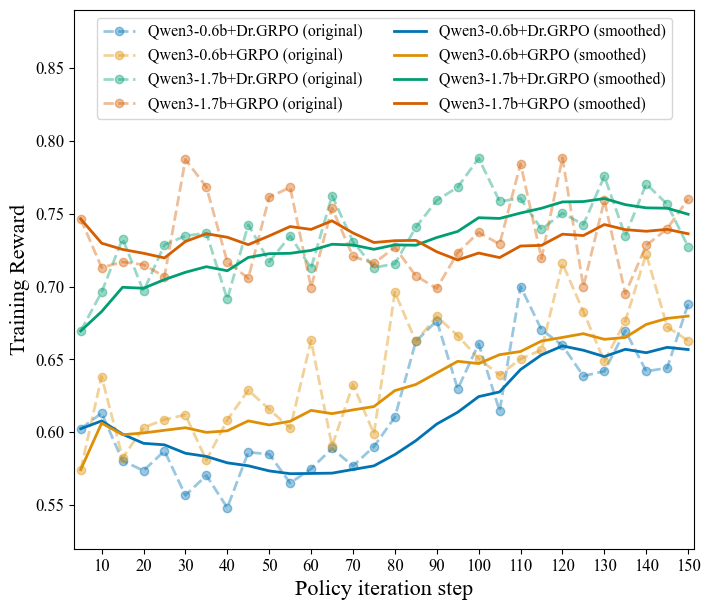

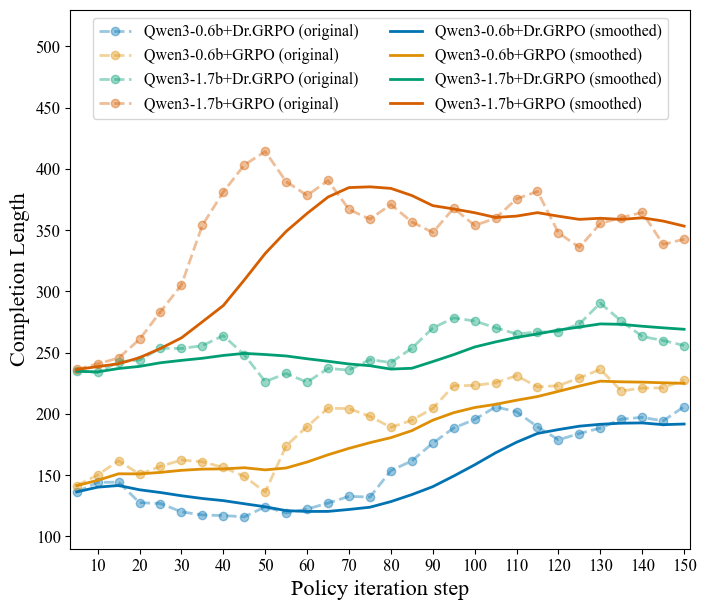

In [4]:
data = {}

data["num"]=4

data["path"]=["./train_result/0.6b/sci/drgrpo/trainer_state.json",
            "./train_result/0.6b/sci/grpo/trainer_state.json",
              "./train_result/1.7b/sci/drgrpo/trainer_state.json",
              "./train_result/1.7b/sci/grpo/trainer_state.json",
            
            ]

data["name"]=["Qwen3-"+i.split("/")[-4]+"+"+("Dr.GRPO" if i.split("/")[-2]=="drgrpo" else "GRPO") for i in data["path"]]

data["ylim"]=[[0.52,0.89],[90,530]]

data["save_path"]="./results/part1/scifact/"
data["task_name"]="part1"

data["corpus"]=[]
corpus_set=[]
for data_path in data["path"]:
    corpus = []
    with open(data_path, 'r', encoding='utf-8') as file:
        corpus = json.load(file)
    data["corpus"].append(corpus)

getresult(data)

## nfcorpus

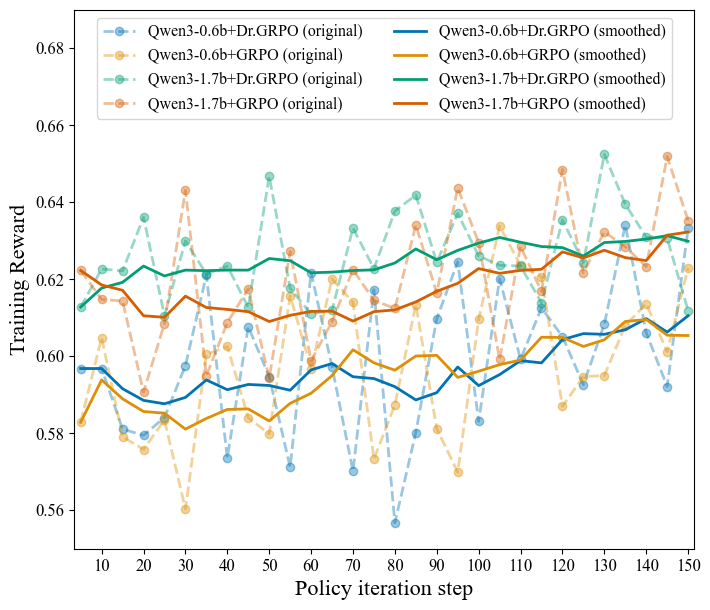

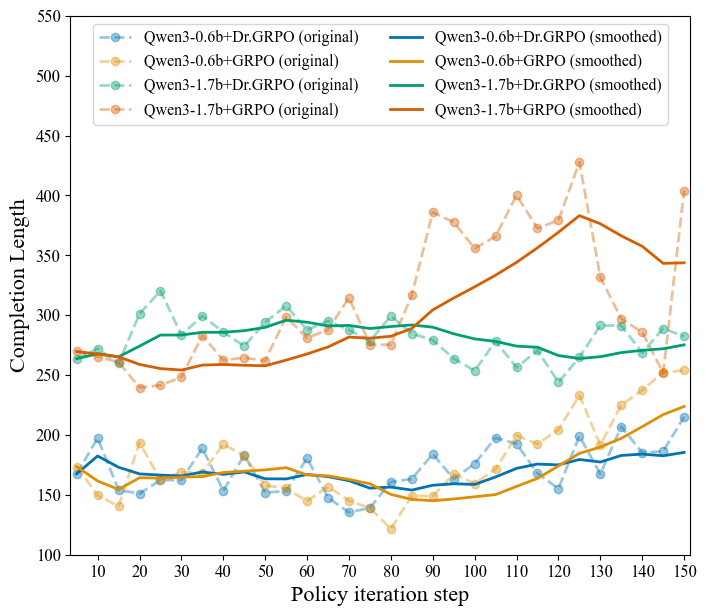

In [5]:
data = {}

data["num"]=4

data["path"]=["./train_result/0.6b/nfc/drgrpo/trainer_state.json",
            "./train_result/0.6b/nfc/grpo/trainer_state.json",
              "./train_result/1.7b/nfc/drgrpo/trainer_state.json",
              "./train_result/1.7b/nfc/grpo/trainer_state.json",
            
            ]

data["name"]=["Qwen3-"+i.split("/")[-4]+"+"+("Dr.GRPO" if i.split("/")[-2]=="drgrpo" else "GRPO") for i in data["path"]]

data["ylim"]=[[0.55,0.69],[100,550]]

data["save_path"]="./results/part1/nfcorpus/"
data["task_name"]="part1"

data["corpus"]=[]
corpus_set=[]
for data_path in data["path"]:
    corpus = []
    with open(data_path, 'r', encoding='utf-8') as file:
        corpus = json.load(file)
    data["corpus"].append(corpus)

getresult(data)

# Part2: 对比0.6b的ce,cp,d

## 函数定义

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import json

plt.rcParams['font.family'] = 'Times New Roman'
plt.rc('font', family='Times New Roman')
mpl.rcParams['mathtext.fontset'] = 'stix'       # 数学字体改为 Times 风格
mpl.rcParams['mathtext.rm'] = 'Times New Roman' # 数学普通文本用 Times New Roman

def smooth_list(x, w=5):
    result = []
    for i in range(len(x)):
        start = max(0, i - w + 1)
        window = x[start:i+1]
        avg = sum(window) / len(window)
        result.append(avg)
    return result


def plot(x, y, label, linestyle='-', linewidth=2,color="",marker="",alpha=1):
    # plt.plot(x, y, label=label, linewidth=2, color='blue', linestyle='-')
    if marker == "":
        line, =plt.plot(x, y, label=label, linestyle=linestyle,linewidth=linewidth, color=color)
    else:
        line, = plt.plot(x, y, label=label, linestyle=linestyle, linewidth=linewidth, color=color,marker='o',alpha=alpha)
    rx=range(0,155,10)
    plt.xticks(rx)
    plt.yticks()
    plt.tick_params(axis='both', labelsize=12)
    # plt.grid(True, linestyle='--', alpha=0.7)  # 添加网格线
    return line

def getresult(data):
    n=data["num"]

    # cmap = [plt.cm.Pastel1(i) for i in range(n)]+[plt.cm.tab10(2*i+1) for i in range(n)]
    # cmap = ["#ff7f50","#3498db","#2e8b57","#8e44ad"]+["#ff7f50","#3498db","#2e8b57","#8e44ad"]
    cmap=[sns.color_palette("colorblind", 4) [i] for i in range(4)]
    
    cnt=0
    lines = []
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    
    plt.figure(figsize=(8, 7))  # 设置图表大小，符合ACM排版要求
    ax1 = plt.gca()
    # ax1.spines['top'].set_visible(False)
    # ax1.spines['right'].set_visible(False)
    for i in range(n):
        corpus=data["corpus"][i]
        y = [i["reward"] for i in corpus["log_history"] if "loss" not in i]
        # x = range(5,5*len(y)+5,5)
        x = range(5,160,5)
        y=y[:len(x)]
        plot(x[:-1], y[:-1], label=data["name"][i]+" (original)",linestyle='--',color=cmap[i],marker='o',alpha=0.4)
    
    for i in range(n):
        corpus=data["corpus"][i]
        y = [i["reward"] for i in corpus["log_history"] if "loss" not in i]
        y=smooth_list(y,8)
        # x = range(5,5*len(y)+5,5)
        x = range(5,160,5)
        y=y[:len(x)]
        plot(x[:-1], y[:-1], label=data["name"][i]+" (smoothed)",color=cmap[i],alpha=0.6)
        
    plt.xlabel('Policy iteration step',fontsize=16)
    plt.ylabel('Training Reward',fontsize=16)
    
    plt.ylim(data["ylim"][0])
    eps=1.5
    plt.xlim([5-eps,150+eps])


    plt.legend(loc='upper left')
    plt.legend(ncol=2, loc='upper center',fontsize=11.5)
    
    save_path = data["save_path"]+data["task_name"]+"_"+"result_reward.pdf"
    os.makedirs(data["save_path"], exist_ok=True)
    plt.savefig(save_path, dpi=600, bbox_inches='tight')
    plt.show()
    


# 设置中文字体支持
plt.rcParams["font.family"] = ["Times New Roman"]
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

task_name = "0811_pt_grpo"



## scifact

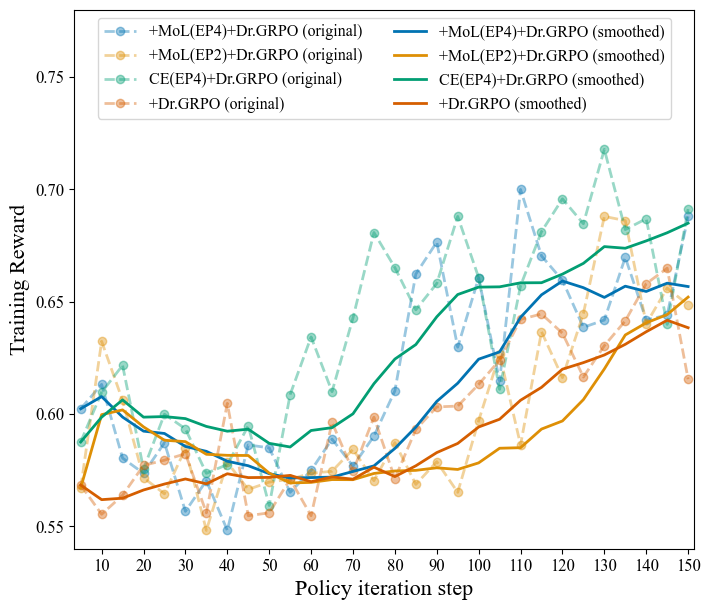

In [7]:
data = {}

data["num"]=4

data["path"]=["./train_result/0.6b/sci/drgrpo/trainer_state.json",
              "./train_result/0.6b/sci/drgrpo/cp22/trainer_state.json",
              "./train_result/0.6b/sci/drgrpo/ce/trainer_state.json",
              "./train_result/0.6b/sci/drgrpo/d/trainer_state.json"
             ]

data["name"]=["+MoL(EP4)+Dr.GRPO","+MoL(EP2)+Dr.GRPO","CE(EP4)+Dr.GRPO","+Dr.GRPO"]

data["ylim"]=[[0.54,0.78]]

data["save_path"]="./results/part2/scifact/"
data["task_name"]="part2"

data["corpus"]=[]

corpus_set=[]
for data_path in data["path"]:
    corpus = []
    with open(data_path, 'r', encoding='utf-8') as file:
        corpus = json.load(file)
    data["corpus"].append(corpus)

getresult(data)

## nfcorpus

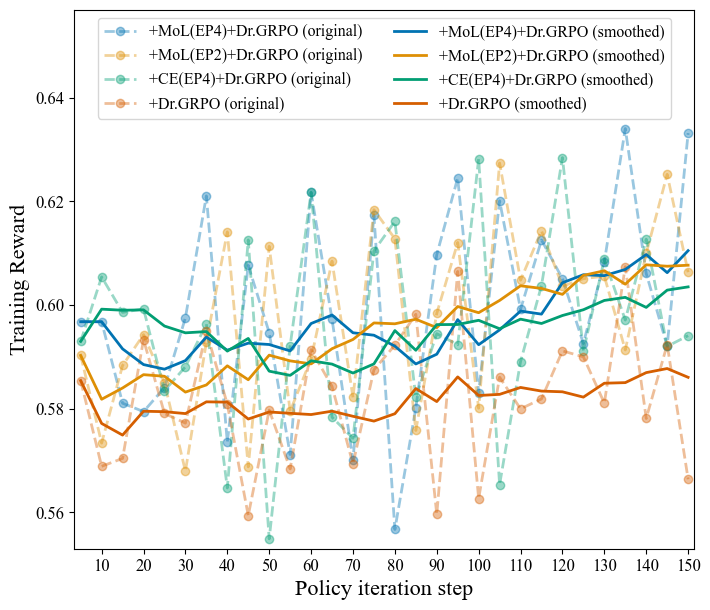

In [8]:
data = {}

data["num"]=4

data["path"]=["./train_result/0.6b/nfc/drgrpo/trainer_state.json",
            "./train_result/0.6b/nfc/drgrpo/cp16/trainer_state.json",
            "./train_result/0.6b/nfc/drgrpo/ce/trainer_state.json",
            "./train_result/0.6b/nfc/drgrpo/d/trainer_state.json"]

data["name"]=["+MoL(EP4)+Dr.GRPO","+MoL(EP2)+Dr.GRPO","+CE(EP4)+Dr.GRPO","+Dr.GRPO"]
# data["name"]=["+MoL(CP32)+Dr.GRPO","CE(CP32)+Dr.GRPO","+Dr.GRPO"]

data["ylim"]=[[0.553,0.657]]

data["save_path"]="./results/part2/nfcorpus/"
data["task_name"]="part2"

data["corpus"]=[]

corpus_set=[]
for data_path in data["path"]:
    corpus = []
    with open(data_path, 'r', encoding='utf-8') as file:
        corpus = json.load(file)
    data["corpus"].append(corpus)

getresult(data)

# part3: 不同n的对比

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import json
from brokenaxes import brokenaxes
import os
import matplotlib as mpl  # 添加matplotlib导入

def plot_nocut(name,data,param):
    n=len(data)/2
    cmap=[sns.color_palette("colorblind", 6) [i] for i in range(6)]
    
    fig, ax1 = plt.subplots(figsize=(8,7))
    # ax1.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    markers=['o','s','^','D']
    
    for id, i in enumerate(data):
        x=i["x"]
        y=i["y"]
        y=[i*100 for i in y]
        if id>=n:
            ax1.plot(x[1:], y[1:], label=i["label"], linestyle='-', linewidth=2, color=cmap[id],marker=markers[id],alpha=0.6,ms=7)
        else:
            ax1.plot(x[1:], y[1:], label=i["label"], linestyle='--', linewidth=2, color=cmap[id],marker=markers[id],alpha=0.6,ms=7)
    
    rx=[1,2,3,4,6,8]
    plt.xticks(rx)
    plt.yticks()
    plt.tick_params(axis='both', which="both", labelsize=12,pad=param["pad"])
    plt.xlabel('Number of Query Expansions', size=16)
    plt.ylabel('Recall', size=16)
    ax1.legend(ncol=2, loc='lower right',fontsize=11.5)
    
    eps=0.1
    plt.ylim(param["ylim"][0])
    plt.xlim([1-eps,8+eps])
    
    ax1.axvline(x=3, color='grey', linestyle=':', linewidth=2)
    
    axins1 = fig.add_axes(param["subfig"])  # 上部分
    # axins2 = fig.add_axes([0.55, 0.28+0.15-0.25, 0.28, 0.10])  # 下部分
    
    # 设置两个子图的显示范围
    axins1.set_ylim(param["ylim"][1])  # 上部分显示范围
    for id, i in enumerate(data):
        x=i["x"]
        y=i["y"]
        y=[i*100 for i in y]
        if id>=3:
            axins1.plot(x[1:], y[1:], label=i["label"],color=cmap[id],marker=markers[id-3],linestyle='-', alpha=0.6,ms=4)
        else:
            axins1.plot(x[1:], y[1:], label=i["label"],color=cmap[id],marker=markers[id],linestyle='--', alpha=0.6,ms=4)
        axins1.set_xscale('log')
    
    
    axins1.axvline(x=3, color='grey', linestyle=':', linewidth=2)
    # axins2.axvline(x=3, color='grey', linestyle=':', linewidth=2)
    plt.xticks(rx[1:])
    custom_ticks = [1, 2, 3, 4, 6, 8]
    
    axins1.set_xticks(custom_ticks)
    axins1.set_xticklabels([str(tick) for tick in custom_ticks])
    plt.tick_params(axis='both', labelsize=12,pad=param["subpad"])
    
    
    save_path = "./results/part3/"
    os.makedirs(save_path, exist_ok=True)
    fig.savefig(save_path+name+".pdf", dpi=600, bbox_inches='tight')


def plot_3(name,data,param,nocut=False):
    def sub_fig(axes1,axes2,ylim1,ylim2,subpad=4,ms=6,dms=4,logscale=True):# param["subaxes"][0],param["subaxes"][1],param["subylim"][1],param["subylim"][0]
        # 创建两个子图用于断裂轴
        axins1 = fig.add_axes(axes1)  # 上部分
        axins2 = fig.add_axes(axes2)  # 下部分
        
        # 设置两个子图的显示范围
        axins1.set_ylim(ylim1)  # 上部分显示范围
        axins2.set_ylim(ylim2)  # 下部分显示范围，断裂[64,68]区间
        
        # 隐藏上部分子图的底部刻度和下部分子图的顶部刻度
        axins1.tick_params(axis='y', which='both', bottom=False, labelsize=12)
        axins2.tick_params(axis='y', which='both', top=False, labelsize=12)
        axins1.tick_params(axis='both', which='both',pad=subpad)
        axins2.tick_params(axis='both', which='both',pad=subpad)
        
        # 隐藏上部分子图的底部边框和下部分子图的顶部边框
        axins1.spines['bottom'].set_visible(False)
        axins2.spines['top'].set_visible(False)
        
        for id, i in enumerate(data):
            x=i["x"]
            y=i["y"]
            y=[i*100 for i in y]
            if id>=n:
                axins1.plot(x[1:], y[1:], label=i["label"],color=cmap[id],marker=markers[id],linestyle='-', alpha=0.6,ms=dms)
                axins2.plot(x[1:], y[1:], label=i["label"],color=cmap[id],marker=markers[id],linestyle='-', alpha=0.6,ms=dms)
            else:
                axins1.plot(x[1:], y[1:], label=i["label"],color=cmap[id],marker=markers[id],linestyle='--', alpha=0.6,ms=dms)
                axins2.plot(x[1:], y[1:], label=i["label"],color=cmap[id],marker=markers[id],linestyle='--', alpha=0.6,ms=dms)
            if logscale:
                axins1.set_xscale('log')
                axins2.set_xscale('log')
        
        # 添加截断符号//
        d = 0.05  # 截断符号的斜率
        kwargs = dict(marker=[(-0.05, -d), (0.05, d)], markersize=ms,
                      linestyle="none", color='k', mec='k', mew=1, clip_on=False)
        axins1.plot([0, 1], [0, 0], transform=axins1.transAxes, **kwargs)
        axins2.plot([0, 1], [1, 1], transform=axins2.transAxes,** kwargs)
        
        axins1.axvline(x=3, color='grey', linestyle=':', linewidth=2)
        axins2.axvline(x=3, color='grey', linestyle=':', linewidth=2)
        
        custom_ticks = [1, 2, 3, 4, 6, 8]
        axins2.set_xticks(custom_ticks)
        axins2.set_xticklabels([str(tick) for tick in custom_ticks])
        axins1.tick_params(axis='x', bottom=False, labelbottom=False)
        axins1.set_xticks(custom_ticks)
        axins1.set_xticklabels([str(tick) for tick in custom_ticks])
        plt.tick_params(axis='both', labelsize=12)

        if not logscale:
            eps=0.1
            axins1.set_xlim([1-eps,8+eps])
            axins2.set_xlim([1-eps,8+eps])
    
    if nocut:
        plot_nocut(name,data,param)
        return
    n=len(data)/2
    fig= plt.figure(figsize=(8,7))

        #     axins1.tick_params(axis='y', which='both', bottom=False, labelsize=12)
        # axins2.tick_params(axis='y', which='both', top=False, labelsize=12)
    # ax1=brokenaxes(ylims=param["ylim"], hspace=0.05)
    cmap=[sns.color_palette("colorblind", 6) [i] for i in range(6)]

    markers=['o','s','^','D']

    x=0
    # openy=0.5
    osize=1.083
    oox=1
    ooy=0.385
    w=0.7764
    h=0.7*osize
    len1=param["ylim"][0][1]-param["ylim"][0][0]
    len2=param["ylim"][1][1]-param["ylim"][1][0]
    h1=h*len1/(len1+len2)
    h2=h*len2/(len1+len2)
    fig_axes=[[x, 0.16+h1+0.015, w,h2],[x, 0.16, w, h1]]
    sub_fig(fig_axes[0],fig_axes[1],param["ylim"][1],param["ylim"][0],subpad=4,ms=9,dms=7,logscale=False)
    plt.xlabel('Number of Query Expansions', size=16)
    ylabel=plt.ylabel('Recall', size=16,x=1,y=0.385/h1)
    plt.legend(ncol=2, loc='lower right',fontsize=11.5)
    
    rx=[1,2,3,4,6,8]
    plt.xticks(rx)

    eps=0.1
    
    sub_fig(param["subaxes"][0],param["subaxes"][1],param["subylim"][1],param["subylim"][0],subpad=0)

    
    
    save_path = "./results/part3/"
    os.makedirs(save_path, exist_ok=True)
    fig.savefig(save_path+name+".pdf", dpi=600, bbox_inches='tight')
    

# 设置中文字体支持
plt.rcParams['font.family'] = 'Times New Roman'
plt.rc('font', family='Times New Roman')
mpl.rcParams['mathtext.fontset'] = 'stix'       # 数学字体改为 Times 风格
mpl.rcParams['mathtext.rm'] = 'Times New Roman' # 数学普通文本用 Times New Roman

task_name = "0811_pt_grpo"

### MOLER VS BASE

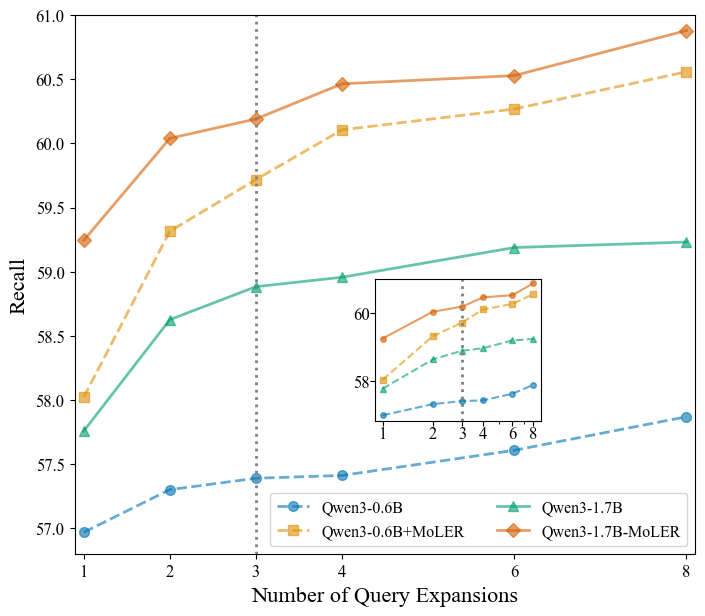

In [11]:
# NFC
data=[]

temp={}
temp["x"]=[0,1,2,3,4,6,8]
temp["y"]=[0.52953,0.5696902167182661,0.5730175438596491,0.5739040144478845,0.5741239731682147,0.5760825593395253,0.5786987616099072]
temp["label"]="Qwen3-0.6B"
data.append(temp)

temp={}
temp["x"]=[0,1,2,3,4,6,8]
temp["y"]=[0.52953,0.5802236842105263,0.5931424251805985,0.5971821362229102,0.6010523839009287,0.6026760061919505,0.6055801702786379]
temp["label"]="Qwen3-0.6B+MoLER"
data.append(temp)

temp={}
temp["x"]=[0,1,2,3,4,6,8]
temp["y"]=[0.52953,0.5775781527347782,0.5862629721362228,0.5888329102167182,0.5895679256965944,0.5918824458204335,0.5923091331269349]
temp["label"]="Qwen3-1.7B"
data.append(temp)

temp={}
temp["x"]=[0,1,2,3,4,6,8]
temp["y"]=[0.52953,0.5924422807017543,0.6003898245614036,0.6019000103199174,0.60464,0.6052788441692467,0.6087932817337461]
temp["label"]="Qwen3-1.7B-MoLER"
data.append(temp)

param={}
param["ylim"]=[[56.8,61],[56.8, 61]]
size=0.9
param["subfig"]=[0.5, 0.3, 0.23*size, 0.225*size]
param["pad"]=4
param["subpad"]=0

# plot_3("number_base_1",data,param)

plot_3("number_base_nfc",data,param,nocut=True)

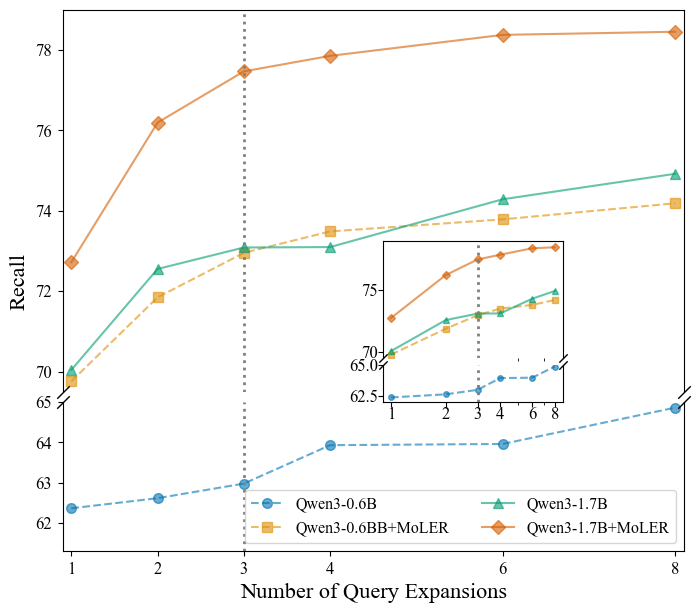

In [12]:
data=[]


temp={}
temp["x"]=[0,1,2,3,4,6,8]
temp["y"]=[0.5982115960324619,0.6236296444444444,0.6261481666666667,0.6297777888888888,0.6393333444444443,0.6396296444444444,0.6486666777777778]
temp["label"]="Qwen3-0.6B"
data.append(temp)


temp={}
temp["x"]=[0,1,2,3,4,6,8]
temp["y"]=[0.5982115960324619,0.6976111333333334,0.7185000166666666,0.7295555666666667,0.7348889,0.7378889,0.7418889]
temp["label"]="Qwen3-0.6BB+MoLER"
data.append(temp)

temp={}
temp["x"]=[0,1,2,3,4,6,8]
temp["y"]=[0.5982115960324619,0.7004444666666666,0.7255555666666665,0.7308889,0.731000011111111,0.7428889,0.7492222333333333]
temp["label"]="Qwen3-1.7B"
data.append(temp)

temp={}
temp["x"]=[0,1,2,3,4,6,8]
temp["y"]=[0.5982115960324619,0.7272222444444444,0.7619629777777778,0.7747,0.7785555666666666,0.7837777888888887,0.7845555666666666]
temp["label"]="Qwen3-1.7B+MoLER"
data.append(temp)

param={}
param["ylim"]=[[61.3, 65], [69.5, 79]]
param["subylim"]=[[62, 65],[69.5, 79]]

x=0.4
y=0.373

size=0.98
w=0.23*size
h=0.225*size
len1=param["subylim"][0][1]-param["subylim"][0][0]
len2=param["subylim"][1][1]-param["subylim"][1][0]
h1=h*len1/(len1+len2)
h2=h*len2/(len1+len2)

param["subaxes"]=[[x, y+h1+0.01, w,h2],[x, y, w, h1]]
param["pad"]=4
param["subpad"]=0



plot_3("number_base_sci",data,param)

### MOLER VS CE

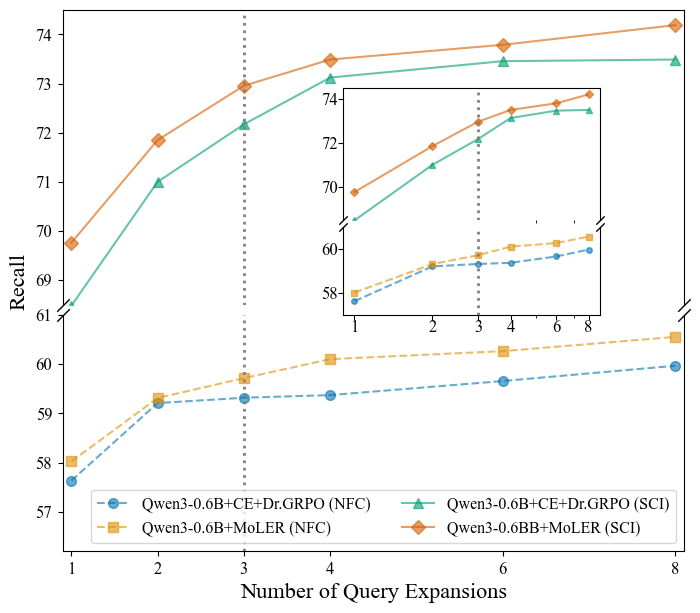

In [13]:
data=[]

temp={}
temp["x"]=[0,1,2,3,4,6,8]
temp["y"]=[0.52953,0.57632128998968,0.5921113003095976,0.5932,0.5937325696594428,0.5965972961816305,0.5997039938080495]
temp["label"]="Qwen3-0.6B+CE+Dr.GRPO (NFC)"
data.append(temp)

temp={}
temp["x"]=[0,1,2,3,4,6,8]
temp["y"]=[0.52953,0.5802236842105263,0.5931424251805985,0.5971821362229102,0.6010523839009287,0.6026760061919505,0.6055801702786379]
temp["label"]="Qwen3-0.6B+MoLER (NFC)"
data.append(temp)

# temp = {}
# temp["x"] = [0,1,2,3,4,6,8]
# temp["y"] = [0.5982115960324619,0.6965555777777778,0.7131111333333333,0.7158518666666667,0.7131481666666667,0.7089259333333334,0.712666688888889]
# temp["label"] = "Qwen3-0.6B+CE+Dr.GRPO (SCI)"
# data.append(temp)

temp={}
temp["x"]=[0,1,2,3,4,6,8]
temp["y"]=[0.5982115960324619,0.6847778,0.7100000111111111,0.7217,0.7312222333333334,0.7345555666666667,0.7348889]
temp["label"]="Qwen3-0.6B+CE+Dr.GRPO (SCI)"
data.append(temp)


temp={}
temp["x"]=[0,1,2,3,4,6,8]
temp["y"]=[0.5982115960324619,0.6976111333333334,0.7185000166666666,0.7295555666666667,0.7348889,0.7378889,0.7418889]
temp["label"]="Qwen3-0.6BB+MoLER (SCI)"
data.append(temp)

param={}
param["ylim"]=[(56.2, 61), (68.5, 74.5)]
param["subylim"]=[[57, 61],[68.5, 74.5]]

x=0.35
y=0.497

size=1.4
w=0.23*size
h=0.225*size
len1=param["subylim"][0][1]-param["subylim"][0][0]
len2=param["subylim"][1][1]-param["subylim"][1][0]
h1=h*len1/(len1+len2)
h2=h*len2/(len1+len2)

param["subaxes"]=[[x, y+h1+0.01, w,h2],[x, y, w, h1]]
param["pad"]=4
param["subpad"]=0

plot_3("number_ce",data,param)

### MOLER VS MSLF

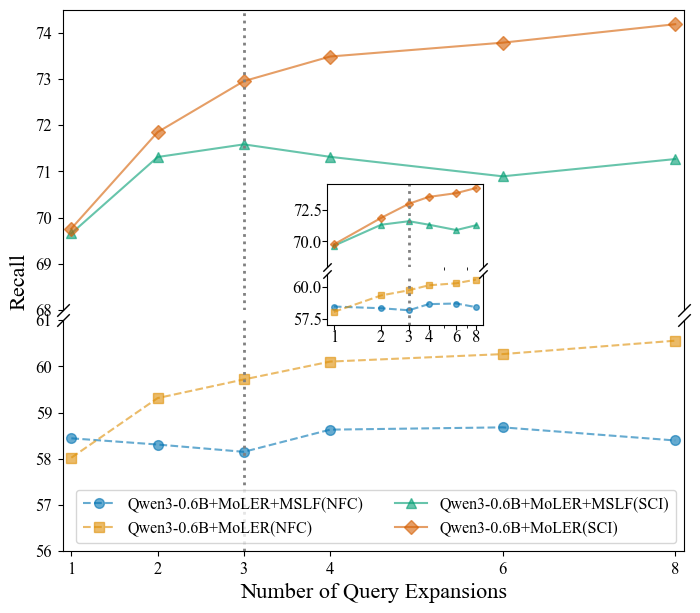

In [14]:
data=[]

temp={}
temp["x"]=[0,1,2,3,4,6,8]
temp["y"]=[0.52953,0.5844235087719297,0.5830799380804953,0.5814963777089783,0.5863038802889576,0.5867997626418989,0.5839581630546955]
temp["label"]="Qwen3-0.6B+MoLER+MSLF(NFC)"
data.append(temp)

temp={}
temp["x"]=[0,1,2,3,4,6,8]
temp["y"]=[0.52953,0.5802236842105263,0.5931424251805985,0.5971821362229102,0.6010523839009287,0.6026760061919505,0.6055801702786379]
temp["label"]="Qwen3-0.6B+MoLER(NFC)"
data.append(temp)


temp={}
temp["x"]=[0,1,2,3,4,6,8]
temp["y"]=[0.5982115960324619,0.6965555777777778,0.7131111333333333,0.7158518666666667,0.7131481666666667,0.7089259333333334,0.712666688888889]
temp["label"]="Qwen3-0.6B+MoLER+MSLF(SCI)"
data.append(temp)

temp={}
temp["x"]=[0,1,2,3,4,6,8]
temp["y"]=[0.5982115960324619,0.6976111333333334,0.7185000166666666,0.7295555666666667,0.7348889,0.7378889,0.7418889]
temp["label"]="Qwen3-0.6B+MoLER(SCI)"
data.append(temp)

param={}
param["ylim"]=[(56, 61), (68, 74.5)]
param["subylim"]=[[57, 61],[68, 74.5]]

x=0.33
y=0.483

w=0.23*0.85
h=0.225*0.85
len1=param["subylim"][0][1]-param["subylim"][0][0]
len2=param["subylim"][1][1]-param["subylim"][1][0]
h1=h*len1/(len1+len2)
h2=h*len2/(len1+len2)

param["subaxes"]=[[x, y+h1+0.01, w,h2],[x, y, w, h1]]
param["pad"]=4
param["subpad"]=0

plot_3("number_mslf",data,param)